In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
data = pd.read_feather("simple_simulation")
input_vars = pd.read_csv("input_parameters.csv")

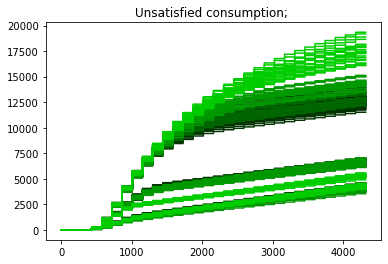

In [2]:
x = np.linspace(0,4319,4320)
d = {}

m = np.zeros([5,96])

for i in range(5):
    for j in range(96):
        
        index = i*96+j
        plotdata = data.o1[data.o0==index]
    
        m[i,j] = data.o1[data.o0==index].iloc[-1]
    
        plt.plot( x, plotdata,color=(0,i/5,0))
plt.title("Unsatisfied consumption; ");

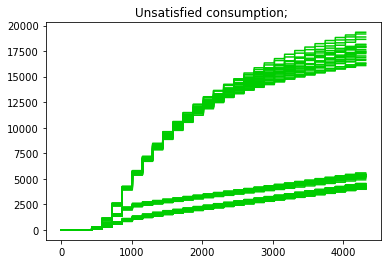

In [9]:
x = np.linspace(0,4319,4320)
d = {}

m = np.zeros([5,96])

for i in [4]:
    for j in range(96):
        
        index = i*96+j
        plotdata = data.o1[data.o0==index]
    
        m[i,j] = data.o1[data.o0==index].iloc[-1]
    
        plt.plot( x, plotdata,color=(0,i/5,0))
plt.title("Unsatisfied consumption; ");

alpha      0.5
beta       0.2
gamma      3.0
epsilon    0.5
Name: 288, dtype: float64

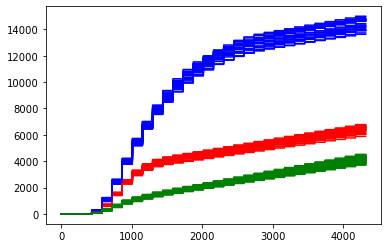

In [20]:
x = np.linspace(0,4319,4320)
d = {}
d[0] = list()
d[1] = list()
d[2] = list()


m = np.zeros([5,96])

for i in [3]:
    for j in range(96):
        
        index = i*96+j
        plotdata = data.o1[data.o0==index]
        
        if plotdata.iloc[-1] > 10000:
            plt.plot( x, plotdata,color='blue')
            d[0].append(index)
            
        else:
            if plotdata.iloc[-1] > 5000:
                plt.plot( x, plotdata,color='red')
                d[1].append(index)
            
            else:
                plt.plot( x, plotdata,color='green')
                d[2].append(index)
    
        m[i,j] = data.o1[data.o0==index].iloc[-1]
    
        
input_vars.iloc[96*3,6:]

In [58]:
input_vars

,Unnamed: 0,capacity_policy,minfood_access_policy,maxfood_access_policy,day_access_policy,rerouting_policy,alpha,beta,gamma,epsilon
0,0,0,0,0,0,0,0.5,0.5,7.0,0.5
1,1,0,0,0,0,1,0.5,0.5,7.0,0.5
2,2,0,0,0,0,2,0.5,0.5,7.0,0.5
3,3,0,0,0,0,3,0.5,0.5,7.0,0.5
4,4,0,0,0,1,0,0.5,0.5,7.0,0.5
...,...,...,...,...,...,...,...,...,...,...
475,475,1,1,2,0,3,0.0,0.0,21.0,0.1
476,476,1,1,2,1,0,0.0,0.0,21.0,0.1
477,477,1,1,2,1,1,0.0,0.0,21.0,0.1
478,478,1,1,2,1,2,0.0,0.0,21.0,0.1


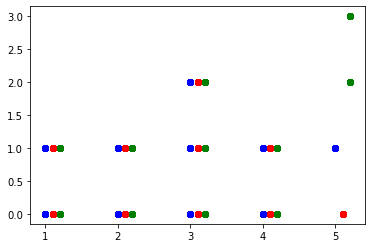

In [60]:
for i in d:    
    for j in d[i]:
        if i == 0:
            for k in range(5): 
                plt.plot(k+1,input_vars.iloc[j,k+1],'bo')
        if i == 1:
            for k in range(5): 
                plt.plot(k+1.1,input_vars.iloc[j,k+1],'ro')

        if i == 2:
            for k in range(5): 
                plt.plot(k+1.2,input_vars.iloc[j,k+1],'go')

In [3]:
data_short = list()
for i in range(len(input_vars)):
    one_set = data[data.o0==i]
    data_short.append(one_set.iloc[-1,:])
data_short = pd.DataFrame(data_short).reset_index()

total_data = pd.concat((input_vars,data_short),axis=1)

In [15]:
dims = np.concatenate((np.array(total_data.columns[1:6]), ["o1"]))

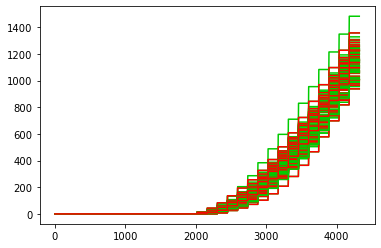

In [102]:
x = np.linspace(0,4319,4320)
d = {}

m = np.zeros([5,96])

selected_scenario = 4

selected_input_vars = input_vars[selected_scenario*96:(selected_scenario+1)*96]
filtered_input_vars = selected_input_vars[(selected_input_vars.rerouting_policy == 2.0) | (selected_input_vars.rerouting_policy == 3.0)]
#filtered_data = data[data.o0 == selected_scenario]

for i in selected_input_vars.index:

    index = i
    plotdata = data.o1[data.o0==index]

#     m[i,j] = data.o1[data.o0==index].iloc[-1]

    plt.plot( x, plotdata,color=(0,selected_scenario/5,0))
    

    if (index in filtered_input_vars.index):
        plt.plot( x, plotdata,color='red' )

In [93]:
2 in filtered_input_vars.index

True

alpha       0.0
beta        0.0
gamma      21.0
epsilon     0.1
Name: 384, dtype: float64

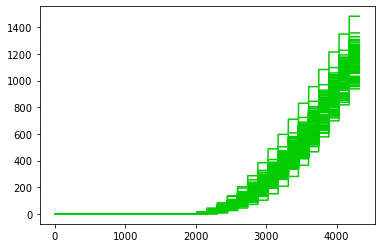

In [46]:
x = np.linspace(0,4319,4320)
d = {}

m = np.zeros([5,96])

for i in [4]:
    for j in range(96):
        
        index = i*96+j
        plotdata = data.o1[data.o0==index]
    
        m[i,j] = data.o1[data.o0==index].iloc[-1]
    
        plt.plot( x, plotdata,color=(0,i/5,0))
        
input_vars.iloc[96*4,6:]